# Data Preprocessing

## Library Imports

In [7]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

## Data Imports

In [9]:
iris = pd.read_csv("project_00/iris.csv")

## EDA (Exploratory Data Analysis)

In [11]:
print(iris.head())

   ID  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0   1           5.1          3.5           1.4          0.2  setosa
1   2           4.9          3.0           1.4          0.2  setosa
2   3           4.7          3.2           1.3          0.2  setosa
3   4           4.6          3.1           1.5          0.2  setosa
4   5           5.0          3.6           1.4          0.2  setosa


print(iris.describe())

In [13]:
print(iris["Species"].value_counts())

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## Handling Missing Value

In [19]:
print(iris.isnull().sum())

ID              0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64


## Feature Engineering

In [22]:
flower_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
iris["Species"] = iris["Species"].map(flower_mapping)

## Handling Outlier

In [25]:
Q1 = iris.quantile(0.25)
Q3 = iris.quantile(0.75)
IQR = Q3 - Q1


In [27]:
iris = iris[~((iris < (Q1 - 1.5 * IQR)) | (iris > (Q3 + 1.5 * IQR))).any(axis=1)]

## Data Visualization

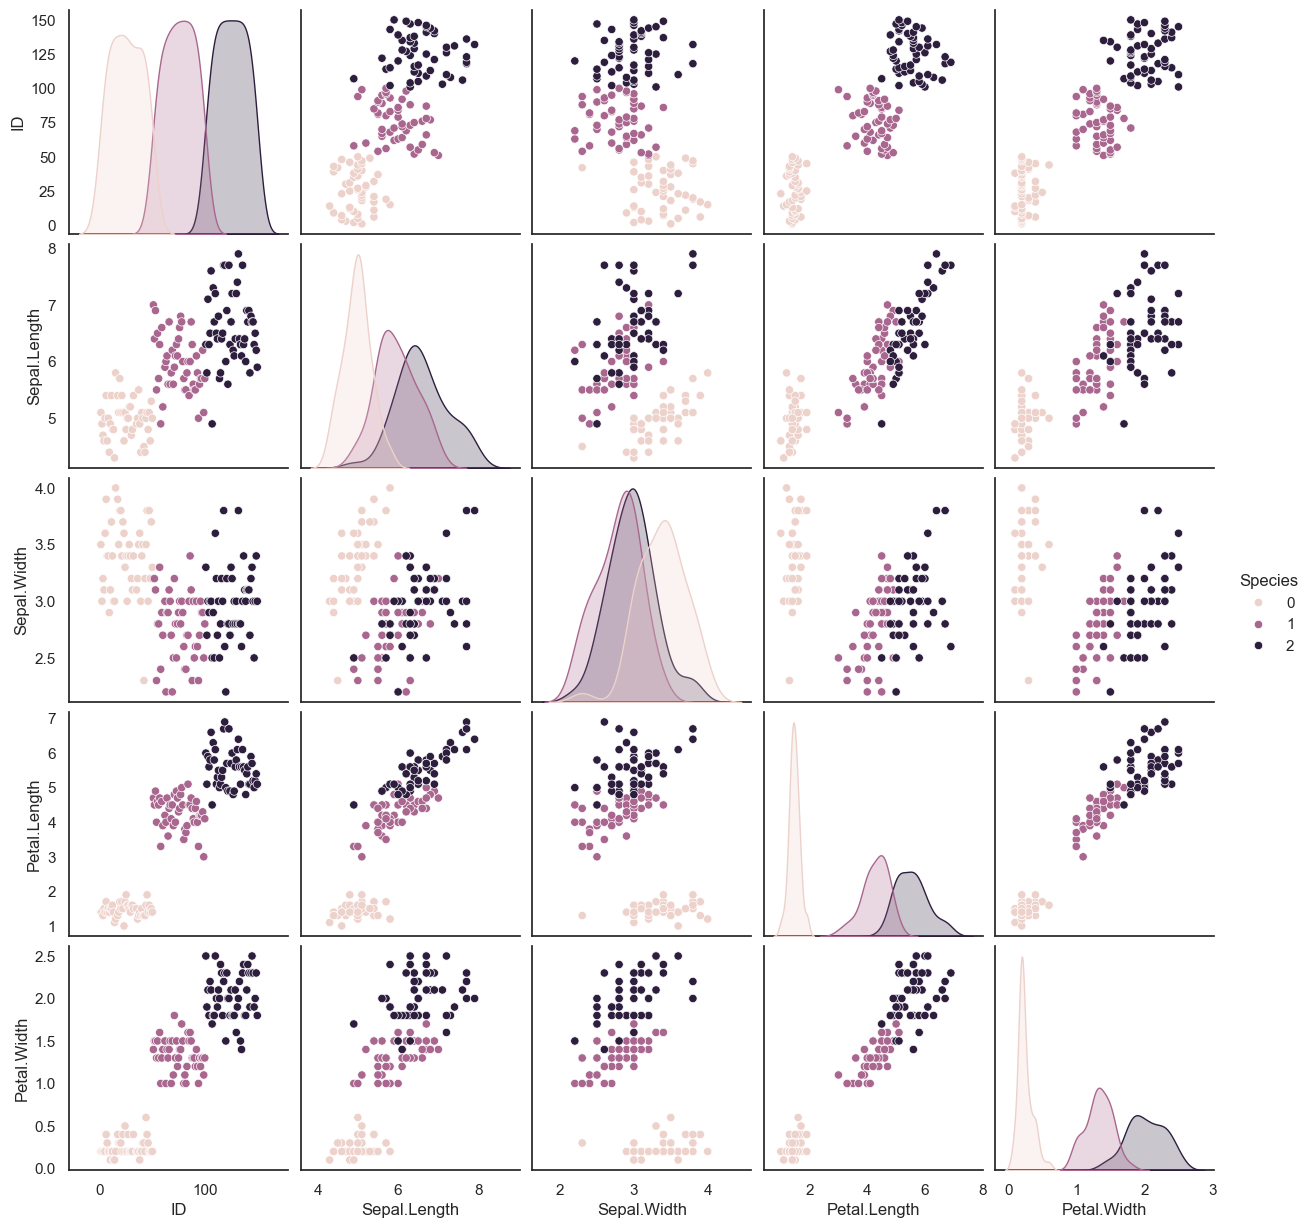

In [30]:
# # sns.set(style="white", color_codes=True)
# # sns.pairplot(iris, hue="Species")
# plt.show()

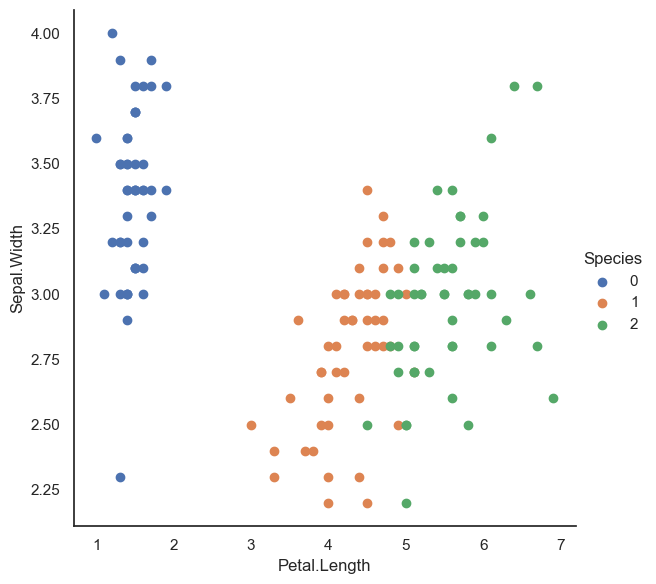

In [31]:
sns.FacetGrid(iris, hue="Species", height=6).map(plt.scatter, "Petal.Length", "Sepal.Width").add_legend()
plt.show()

# Model Building

## Train Test Split 

In [34]:
X = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].values
y = iris['Species'].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Initalization

In [37]:
scaler = StandardScaler()

In [38]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training

In [40]:
model = LogisticRegression(random_state=42)

In [41]:

model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

## Hyper Parameter Tuining

In [43]:
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

In [44]:
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']})

In [45]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 10, 'penalty': 'l2'}


In [46]:
best_model = grid_search.best_estimator_

# Evaluation and Result

In [48]:
y_pred = best_model.predict(X_test_scaled)

In [49]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [51]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[12  0  0]
 [ 0  7  1]
 [ 0  0 10]]


In [57]:
print("Model Accuracy:", best_model.score(X_test_scaled, y_test))

Model Accuracy: 0.9666666666666667


## Research